Connect to Google Drive

In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
#move to images folder 
%cd /content/gdrive/MyDrive/dataset/animation/

/content/gdrive/MyDrive/dataset/animation


Resize and Reshape

In [21]:
import numpy as np
from PIL import Image, ImageSequence
import matplotlib.pyplot as plt

In [14]:
from scipy import stats
import statistics

collect frame for stat

In [10]:
n_frames = []
IMAGE_SIZE = 128

In [11]:
images_path = 'train/'
for i in range(100, 1000):
  img = Image.open('%s%05d.gif'%(images_path, i))
  frames = np.array([np.array(frame.copy().convert('RGB').resize((IMAGE_SIZE, IMAGE_SIZE), Image.ANTIALIAS).getdata(),dtype=np.uint8).reshape(IMAGE_SIZE,IMAGE_SIZE,3) for frame in ImageSequence.Iterator(img)])
  n_frames.append(frames.shape[0])

images_path = 'test/'
for i in range(0, 100):
  img = Image.open('%s%05d.gif'%(images_path, i))
  frames = np.array([np.array(frame.copy().convert('RGB').resize((IMAGE_SIZE, IMAGE_SIZE), Image.ANTIALIAS).getdata(),dtype=np.uint8).reshape(IMAGE_SIZE,IMAGE_SIZE,3) for frame in ImageSequence.Iterator(img)])
  n_frames.append(frames.shape[0])

In [ ]:
n_frames

In [23]:
#move to folder for save
%cd /content/gdrive/MyDrive/dataset/dataset_npy

np.save('n_frames.npy', n_frames)

/content/gdrive/MyDrive/dataset/dataset_npy


In [20]:
mean = statistics.mean(n_frames)
median = statistics.median(n_frames)
mode = statistics.mode(n_frames)

print("mean : " + str(mean))
print("median : " + str(median))
print("mode : " + str(mode))

mean : 24.078
median : 12.5
mode : 8


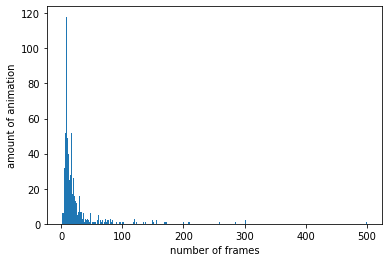

In [39]:
plt.hist(n_frames, bins=max(n_frames))
plt.xlabel('number of frames')
plt.ylabel('amount of animation')
plt.show()

collect animation to numpy

In [26]:
#move to images folder 
%cd /content/gdrive/MyDrive/dataset/animation/

/content/gdrive/MyDrive/dataset/animation


In [27]:
dataset = []
threshold = 8
IMAGE_SIZE = 128

In [28]:
images_path = 'train/'
for i in range(100, 1000):
  img = Image.open('%s%05d.gif'%(images_path, i))
  frames = np.array([np.array(frame.copy().convert('RGB').resize((IMAGE_SIZE, IMAGE_SIZE), Image.ANTIALIAS).getdata(),dtype=np.uint8).reshape(IMAGE_SIZE,IMAGE_SIZE,3) for frame in ImageSequence.Iterator(img)])
  if(frames.shape[0] == threshold):
    dataset.append(np.asarray(frames))
  elif(frames.shape[0] > threshold):
    frames = frames[:threshold,:,:]
    dataset.append(np.asarray(frames))

In [29]:
dataset[0].shape

(8, 128, 128, 3)

In [31]:
dataset = np.reshape(dataset, (-1, threshold, IMAGE_SIZE, IMAGE_SIZE, 3))

dataset.shape
train_size = dataset.shape[0]
print(train_size)

734


In [32]:
dataset2 = []

In [33]:
images_path = 'test/'
for i in range(0, 100):
  img = Image.open('%s%05d.gif'%(images_path, i))
  frames = np.array([np.array(frame.copy().convert('RGB').resize((IMAGE_SIZE, IMAGE_SIZE), Image.ANTIALIAS).getdata(),dtype=np.uint8).reshape(IMAGE_SIZE,IMAGE_SIZE,3) for frame in ImageSequence.Iterator(img)])
  if(frames.shape[0] == threshold):
    dataset2.append(np.asarray(frames))
  elif(frames.shape[0] > threshold):
    frames = frames[:threshold,:,:]
    dataset2.append(np.asarray(frames))

In [34]:
dataset2 = np.reshape(dataset2, (-1, threshold, IMAGE_SIZE, IMAGE_SIZE, 3))

dataset2.shape

(87, 8, 128, 128, 3)

In [35]:
full_dataset = np.append(dataset, dataset2, axis = 0)
full_dataset.shape

(821, 8, 128, 128, 3)

In [36]:
#move to folder for save
%cd /content/gdrive/MyDrive/dataset/dataset_npy

np.save('gif_train128_8.npy', dataset)
np.save('gif_test128_8.npy', dataset2)
np.save('gif_all128_8.npy', full_dataset)

/content/gdrive/MyDrive/dataset/dataset_npy


#note



threshold12
train 513
test 61
all 574

threshold8 train 734 test 87 all 821